# NBA Cluster Analysis 

<b> Importing Libraries <b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
file_path = '/Users/monicaleo/Downloads/nba.csv'

In [3]:
nba = pd.read_csv(file_path)

In [4]:
nba.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,Vince Carter,ATL,42,76,25,51,1330,16.9,5.9,14.1,...,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4
1,Trae Young,ATL,20,81,29,52,2503,24.8,8.4,20.1,...,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4
2,Taurean Prince,ATL,25,55,19,36,1552,19.1,6.8,15.3,...,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3
3,Omari Spellman,ATL,21,46,15,31,805,13.5,4.9,12.1,...,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0
4,Miles Plumlee,ATL,30,18,1,17,173,18.5,7.4,11.1,...,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9


In [5]:
nba.shape

(530, 29)

In [6]:
nba.mean()

AGE            26.350943
GP             49.247170
W              24.673585
L              24.573585
MIN          1121.626415
PTS            16.530943
FGM             6.184151
FGA            13.981698
FG%            43.991132
3PM             1.666604
3PA             5.050755
3P%            29.028113
FTM             2.496981
FTA             3.402642
FT%            69.677547
OREB            1.865849
DREB            5.682642
REB             7.546038
AST             3.650189
TOV             2.103585
STL             1.264717
BLK             0.801887
PF              3.731887
FP             35.151321
DD2             4.449057
TD3             0.239623
Plusminus      -1.690377
dtype: float64

In [7]:
nba.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,26.350943,49.247170,24.673585,24.573585,1121.626415,16.530943,6.184151,13.981698,43.991132,1.666604,...,7.546038,3.650189,2.103585,1.264717,0.801887,3.731887,35.151321,4.449057,0.239623,-1.690377
std,4.215985,26.048763,15.891797,14.616563,838.666186,6.540621,2.716688,4.473457,11.181947,1.249498,...,4.282517,2.370624,1.160392,0.866702,0.830831,1.677377,10.167533,10.032191,1.772809,11.138441
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-94.100000
25%,23.000000,27.000000,11.000000,13.000000,322.750000,12.925000,4.800000,11.200000,40.200000,0.700000,...,4.725000,2.000000,1.400000,0.900000,0.300000,2.800000,28.750000,0.000000,0.000000,-5.600000
50%,26.000000,56.000000,24.000000,26.000000,1069.000000,15.850000,5.900000,13.400000,43.850000,1.700000,...,6.600000,3.000000,1.900000,1.200000,0.600000,3.500000,34.000000,0.000000,0.000000,-1.000000
75%,29.000000,73.000000,38.000000,35.000000,1836.500000,19.800000,7.500000,16.275000,48.950000,2.400000,...,9.700000,5.000000,2.600000,1.500000,1.000000,4.500000,40.400000,3.000000,0.000000,2.800000
max,42.000000,82.000000,60.000000,63.000000,3028.000000,83.800000,41.900000,43.900000,100.000000,9.400000,...,43.900000,14.300000,10.700000,10.700000,6.500000,18.800000,83.800000,69.000000,34.000000,75.300000


In [8]:
nba.isnull().sum()

PLAYER       0
TEAM         0
AGE          0
GP           0
W            0
L            0
MIN          0
PTS          0
FGM          0
FGA          0
FG%          0
3PM          0
3PA          0
3P%          0
FTM          0
FTA          0
FT%          0
OREB         0
DREB         0
REB          0
AST          0
TOV          0
STL          0
BLK          0
PF           0
FP           0
DD2          0
TD3          0
Plusminus    0
dtype: int64

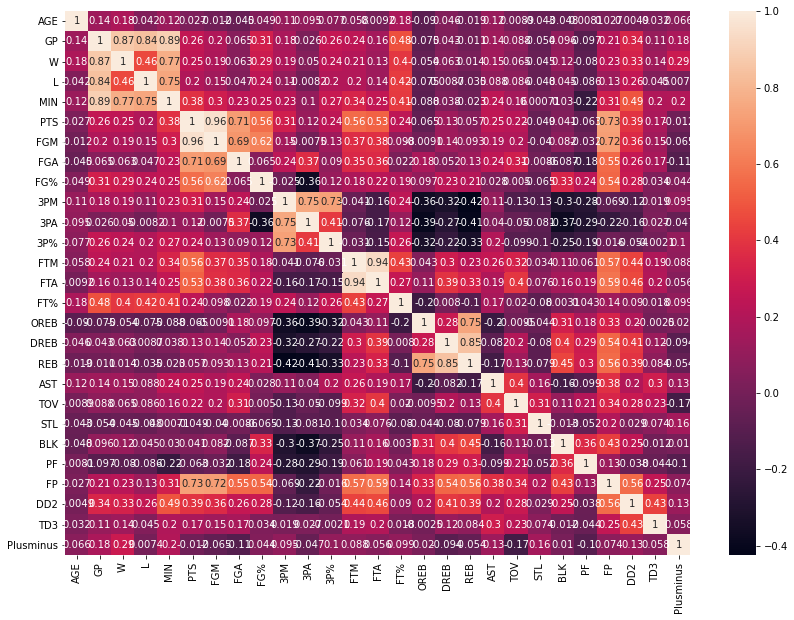

In [9]:
correlation = nba.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation, annot=True)

In [11]:
# Drop player name and team 
drop = ['PLAYER','TEAM']
nba_train= nba.drop(columns=drop)
nba_train.head()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,42,76,25,51,1330,16.9,5.9,14.1,41.9,3.7,...,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4
1,20,81,29,52,2503,24.8,8.4,20.1,41.8,2.5,...,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4
2,25,55,19,36,1552,19.1,6.8,15.3,44.1,3.2,...,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3
3,21,46,15,31,805,13.5,4.9,12.1,40.2,2.2,...,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0
4,30,18,1,17,173,18.5,7.4,11.1,66.7,0.0,...,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9


<font size="4"> <b> PCA </font> <b>

Before doing PCA, it is important to do scaling

In [12]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_nba = scaler.fit_transform(nba_train)

In [13]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(2) # 2-D graphs are easier to interpret
fit = pca.fit_transform(scaled_nba)

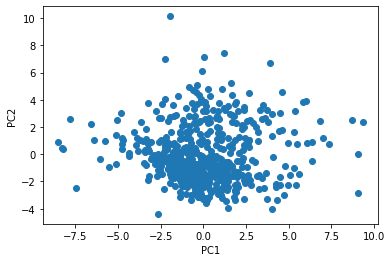

In [14]:
pca_vars = pd.DataFrame(fit, columns = ['PC1','PC2'])
plt.scatter(pca_vars['PC1'],pca_vars['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2');
plt.show()

Two principal components explained variance ratio: 0.4


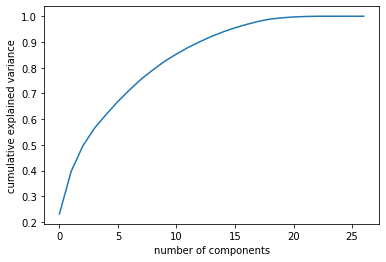

In [15]:
pca = PCA().fit(scaled_nba)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

print("Two principal components explained variance ratio:", round(sum(pca.explained_variance_ratio_[0:2]),2))

As you can see from the plot above, 2 principal components explains about 40% of the variance in the dataset. This is not a very high percentage. A better percentage would be about 70%, which is achieved with 7 principal components.

In [16]:
print("Seven principal components explained variance ratio:", round(sum(pca.explained_variance_ratio_[0:7]),2))

Seven principal components explained variance ratio: 0.71


<font size="4"> <b> K-Means </font> <b>

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(5)
KM = kmeans.fit(scaled_nba)

In [22]:
labels = KM.labels_
nba['cluster'] = labels

In [23]:
KM.cluster_centers_

array([[ 2.07394415e-01,  6.11588818e-01,  6.86400622e-01,
         3.43650744e-01,  1.19425851e+00,  1.75797936e+00,
         1.49840994e+00,  1.52286846e+00,  3.77850186e-01,
         5.61349532e-01,  4.19095128e-01,  3.55169078e-01,
         1.55212738e+00,  1.37303868e+00,  3.46414516e-01,
        -1.49422717e-01,  2.63730459e-01,  9.99027940e-02,
         1.32649297e+00,  9.73925303e-01,  1.37381552e-01,
        -1.12913555e-01, -5.88967919e-01,  1.53973363e+00,
         1.54749652e+00,  1.07458442e+00,  2.43785384e-01],
       [-5.49673820e-01, -1.68239267e+00, -1.38310634e+00,
        -1.49448283e+00, -1.29679902e+00, -1.59192830e+00,
        -1.35345234e+00, -1.74107356e-01, -2.25784515e+00,
        -8.42988244e-01,  8.71937112e-02, -1.30876429e+00,
        -1.16548371e+00, -1.01459126e+00, -2.93791472e+00,
         4.97368999e-01, -7.66763047e-01, -2.54505347e-01,
        -7.99297670e-01, -3.26564359e-01,  4.16086932e-01,
        -5.05687115e-01, -1.21249207e+00, -1.41070901e+

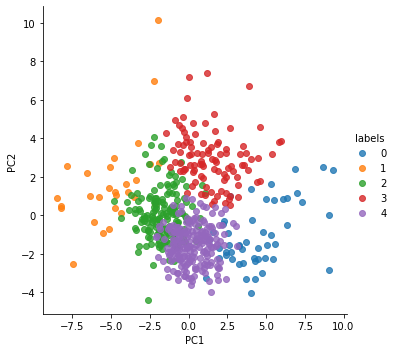

In [24]:
pca_vars['labels'] = labels
sns.lmplot(x = 'PC1', y = 'PC2', data = pca_vars,hue ='labels', fit_reg= False)

In [29]:
nba[nba['cluster']==0]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
1,Trae Young,ATL,20,81,29,52,2503,24.8,8.4,20.1,...,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4,0
9,John Collins,ATL,21,61,24,37,1828,26.0,10.2,18.2,...,2.6,2.6,0.5,0.9,4.4,47.0,32,0,-1.7,0
21,Spencer Dinwiddie,BKN,26,68,36,32,1914,23.9,7.6,17.3,...,6.5,3.2,0.8,0.4,3.9,38.2,2,0,-1.8,0
31,D'Angelo Russell,BKN,23,81,42,39,2448,28.0,10.8,24.8,...,9.2,4.1,1.6,0.3,2.3,49.7,14,0,0.4,0
42,Kyrie Irving,BOS,27,67,37,30,2214,28.8,10.9,22.4,...,8.4,3.1,1.9,0.6,3.0,53.0,21,1,6.0,0
59,Kemba Walker,CHA,29,82,39,43,2863,29.4,10.2,23.5,...,6.8,2.9,1.4,0.5,1.8,48.3,10,0,0.5,0
68,Zach LaVine,CHI,24,63,16,47,2171,27.5,9.8,20.9,...,5.2,4.0,1.1,0.5,2.6,42.6,2,0,-5.5,0
79,Lauri Markkanen,CHI,22,52,16,36,1682,23.2,8.1,18.9,...,1.8,2.0,0.9,0.8,2.9,42.2,20,0,-4.7,0
92,Kevin Love,CLE,30,22,7,15,598,25.0,7.3,18.9,...,3.2,2.8,0.4,0.3,3.6,48.4,12,0,-3.7,0
112,Luka Doncic,DAL,20,72,28,44,2318,26.3,8.7,20.5,...,7.4,4.3,1.3,0.4,2.4,50.1,24,8,-2.0,0


In [30]:
nba[nba['cluster']==4]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,Vince Carter,ATL,42,76,25,51,1330,16.9,5.9,14.1,...,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4,4
2,Taurean Prince,ATL,25,55,19,36,1552,19.1,6.8,15.3,...,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3,4
5,Kevin Huerter,ATL,20,75,27,48,2049,14.2,5.4,12.8,...,4.2,2.1,1.3,0.5,3.0,29.3,1,0,-2.3,4
6,Kent Bazemore,ATL,29,67,24,43,1643,19.0,6.8,16.8,...,3.7,2.9,2.2,1.0,4.1,38.8,0,0,-7.2,4
14,DeAndre' Bembry,ATL,24,82,29,53,1931,14.2,5.7,12.8,...,4.2,2.9,2.2,0.8,3.9,35.5,3,0,-4.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Trevor Ariza,WAS,33,69,22,47,2349,14.7,5.0,12.5,...,4.3,1.8,1.5,0.4,2.2,32.6,5,0,-5.7,4
514,Tomas Satoransky,WAS,27,80,32,48,2164,13.1,4.8,9.8,...,7.4,2.2,1.5,0.2,3.2,33.4,7,1,-1.0,4
521,Jeff Green,WAS,32,77,29,48,2097,18.0,6.2,13.1,...,2.6,1.9,0.8,0.7,3.1,31.8,2,0,-1.8,4
522,Jabari Parker,WAS,24,64,18,46,1724,21.6,8.6,17.4,...,3.5,3.5,1.1,0.7,3.4,40.4,8,0,-4.7,4


As we can see from the results, most of the well-known players are in cluster 0. I would think that cluster 0 is the elite group. As for cluster 4, most of the players are role players. 